In [1]:
%autosave 60
%matplotlib inline

Autosaving every 60 seconds


In [4]:
import astropy.constants as c
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

<Table length=740>
  Name     zcmb    zhel     mb   ...  RAJ2000    DEJ2000     bias   SimbadName
                           mag   ...    deg        deg       mag              
bytes12  float32 float32 float32 ...  float64    float64   float32   bytes17  
-------- ------- ------- ------- ... ---------- ---------- ------- -----------
  03D1au   0.503  0.5043  23.002 ...  36.043210  -4.037469   0.002 SNLS 03D1au
  03D1aw   0.581  0.5820  23.574 ...  36.061634  -4.517158   0.001 SNLS 03D1aw
  03D1ax   0.495  0.4960  22.960 ...  36.097287  -4.720774   0.002 SNLS 03D1ax
  03D1bp   0.346  0.3470  22.398 ...  36.657235  -4.838779   0.000 SNLS 03D1bp
  03D1co   0.678  0.6790  24.078 ...  36.567748  -4.935050  -0.003 SNLS 03D1co
  03D1dt   0.611  0.6120  23.285 ...  36.629968  -4.052341   0.000 SNLS 03D1dt
  03D1ew   0.866  0.8680  24.354 ...  36.058795  -4.665852  -0.018 SNLS 03D1ew
  03D1fc   0.331  0.3320  21.861 ...  36.431648  -4.144059  -0.001 SNLS 03D1fc
  03D1fq   0.799  0.8000  24.510 ...  36.731935  -4.302217  -0.012 SNLS 03D1fq
     ...     ...     ...     ... ...        ...        ...     ...         ...
sn2006td   0.016  0.0159  15.720 ...  29.565670  36.349380  -0.009    sn2006td
sn2007ae   0.063  0.0644  17.798 ... 255.466950  79.031740  -0.020    sn2007ae
sn2007bc   0.022  0.0208  15.902 ... 169.810690  20.808960  -0.009    sn2007bc
sn2007bd   0.032  0.0310  16.581 ... 127.889060  -1.199370  -0.011    sn2007bd
sn2007ci   0.019  0.0181  15.893 ... 176.441050  19.770480  -0.009    sn2007ci
sn2007co   0.027  0.0270  16.504 ... 275.765000  29.897050  -0.010    sn2007co
sn2007cq   0.025  0.0259  15.798 ... 333.668430   5.080160  -0.010    sn2007cq
 sn2007f   0.024  0.0236  15.896 ... 195.812750  50.618760  -0.009     sn2007f
sn2007qe   0.024  0.0240  16.068 ... 358.553990  27.409170  -0.009    sn2007qe
sn2008bf   0.022  0.0213  15.719 ... 181.011990  20.245080  -0.009    sn2008bf

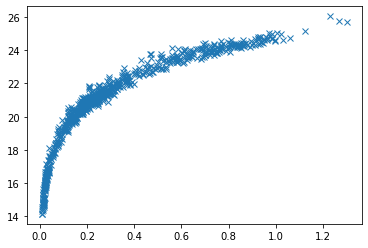

In [8]:
from astroquery.vizier import Vizier

vizier = Vizier(row_limit=1000)
tables = vizier.get_catalogs('J/A+A/568/A22/tablef3')
table = tables[0]
display(table)

plt.plot(table['zcmb'], table['mb'], 'x')

In [15]:
from astropy.io import ascii
from io import BytesIO

b = BytesIO()

ascii.write(table, format='latex')

\begin{table}
\begin{tabular}{ccccccccccccccccccccc}
Name & zcmb & zhel & mb & e_mb & x1 & e_x1 & c & e_c & logMst & e_logMst & tmax & e_tmax & cov_mb_s_ & cov_mb_c_ & cov_s_c_ & set & RAJ2000 & DEJ2000 & bias & SimbadName \\
 &  &  & $\mathrm{mag}$ & $\mathrm{mag}$ &  &  &  &  & [Msun] & [Msun] & $\mathrm{d}$ & $\mathrm{d}$ &  &  &  &  & $\mathrm{deg}$ & $\mathrm{deg}$ & $\mathrm{mag}$ &  \\
03D1au & 0.503 & 0.5043 & 23.002 & 0.088 & 1.273 & 0.150 & -0.012 & 0.030 & 9.517 & 0.110 & 52909.745 & 0.214 & 0.00079 & 0.00044 & -0.00003 & 1 & 36.043210 & -4.037469 & 0.002 & SNLS 03D1au \\
03D1aw & 0.581 & 0.5820 & 23.574 & 0.090 & 0.974 & 0.274 & -0.025 & 0.037 & 9.169 & 0.088 & 52902.898 & 0.353 & 0.00282 & 0.00041 & 0.00157 & 1 & 36.061634 & -4.517158 & 0.001 & SNLS 03D1aw \\
03D1ax & 0.495 & 0.4960 & 22.960 & 0.088 & -0.729 & 0.102 & -0.100 & 0.030 & 11.580 & 0.112 & 52915.924 & 0.112 & 0.00054 & 0.00047 & -0.00002 & 1 & 36.097287 & -4.720774 & 0.002 & SNLS 03D1ax \\
03D1bp & 0.346 & 0.34

In [37]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.stats import sigma_clipped_stats
from astropy.coordinates import SkyCoord
from photutils import DAOStarFinder

/opt/conda/lib/python3.7/site-packages/astropy/io/fits/verify.py:117: VerifyWarning: Verification reported errors:
  warnings.warn(line, VerifyWarning)
/opt/conda/lib/python3.7/site-packages/astropy/io/fits/verify.py:117: VerifyWarning: Card 'SWCREATE' is not FITS standard (invalid value string: 'SkyCam(Linux)      / Name of software that created the image').  Fixed 'SWCREATE' card to meet the FITS standard.
  warnings.warn(line, VerifyWarning)
/opt/conda/lib/python3.7/site-packages/astropy/io/fits/verify.py:117: VerifyWarning: Note: astropy.io.fits uses zero-based indexing.

  warnings.warn(line, VerifyWarning)
/opt/conda/lib/python3.7/site-packages/astropy/io/fits/verify.py:117: VerifyWarning: Card 'PROGECT' is not FITS standard (invalid value string: 'MASTER-SAAO').  Fixed 'PROGECT' card to meet the FITS standard.
  warnings.warn(line, VerifyWarning)
/opt/conda/lib/python3.7/site-packages/astropy/io/fits/verify.py:117: VerifyWarning: Card 'CUNIT2' is not FITS standard (invalid value

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    [(257.02158141, -75.64213143), (257.00241186, -75.64131278),
     (256.87275581, -75.63463529)]>

<Table length=721>
  USNO-A2.0    RAJ2000    DEJ2000   ACTflag Mflag    Bmag    Rmag   Epoch  
                 deg        deg                      mag     mag      yr   
   bytes13     float64    float64    bytes1 bytes1 float32 float32 float64 
------------- ---------- ---------- ------- ------ ------- ------- --------
0075-05656967 256.750039 -75.591053                   19.3    18.2 1980.411
0075-05657176 256.757859 -75.558487                   20.0    18.1 1980.411
0075-05657277 256.761903 -75.550787                   17.4    16.8 1980.411
0075-05657312 256.762892 -75.597200                   18.1    17.4 1980.411
0075-05657362 256.764648 -75.590856                   18.5    17.9 1980.411
0075-05657389 256.765575 -75.576889                   19.5    18.1 1980.411
0075-05657440 256.767167 -75.599539                   19.0    18.0 1980.411
0075-05657515 256.769325 -75.608442                   18.8    18.0 1980.411
0075-05657526 256.769689 -75.571828                   20.3    17.8 1981.384
          ...        ...        ...     ...    ...     ...     ...      ...
0075-05677695 257.466053 -75.567092                   20.0    17.9 1980.411
0075-05677856 257.471912 -75.557400                   20.6    18.1 1980.411
0075-05678099 257.480400 -75.579798                   17.1    16.2 1980.411
0075-05678150 257.482445 -75.563212                   18.7    17.4 1980.411
0075-05678214 257.484384 -75.563239                   20.1    18.1 1980.411
0075-05678238 257.485523 -75.576262                   18.6    17.8 1980.411
0075-05678304 257.487773 -75.570473                   17.4    15.5 1980.411
0075-05678352 257.489456 -75.595395                   20.3    18.1 1980.411
0075-05678480 257.494081 -75.572817                   18.7    17.8 1980.411
0075-05678524 257.496064 -75.577884                   18.3    17.5 1980.411

Number of outliers: 2


(0.0, 256.0)

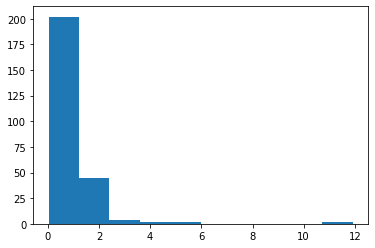

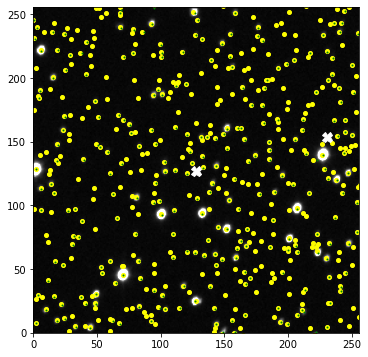

In [56]:
master_fits = fits.open('MASTER.fit', memmap=False)
hdu = master_fits[0]
data = hdu.data
wcs = WCS(hdu.header)
# print(wcs)

mean, median, std = sigma_clipped_stats(data)
star_finder = DAOStarFinder(threshold=3*std, fwhm=3)
pixel_stars = star_finder(data - median)
# print(f'Number of stars: {len(pixel_stars)}')
x, y = pixel_stars['xcentroid'], pixel_stars['ycentroid']
coords = SkyCoord.from_pixel(x, y, wcs)
display(coords[:3])
upper_left = SkyCoord.from_pixel(0, 0, wcs)
lower_right = SkyCoord.from_pixel(*data.shape, wcs)
diag = np.abs(upper_left.separation(lower_right))
# print(f'diag = {diag}')
center = SkyCoord.from_pixel(data.shape[0] / 2, data.shape[1] / 2, wcs)

usno_table = vizier.query_region(center, radius=diag/2, catalog='USNO-A2.0')[0]
display(usno_table)
usno = SkyCoord(ra=usno_table['RAJ2000'], dec=usno_table['DEJ2000'],
                unit='deg')
# display(usno[:3])
usno_pixel = usno.to_pixel(wcs)

idx_usno, sep, _ = coords.match_to_catalog_sky(usno)
plt.hist(sep.arcsec)

idx_outliers = sep > 10*u.arcsec
print(f'Number of outliers: {np.count_nonzero(outliers)}')

plt.figure(figsize=(6,6))
plt.imshow(data, cmap='gray', vmax=3e3)
plt.plot(*usno_pixel, 'o', color='yellow', ms=4)
plt.plot(x, y, '.', color='green', ms=2)
plt.plot(x[idx_outliers], y[idx_outliers], 'X', color='white', ms=10)
plt.xlim([0, data.shape[0]])
plt.ylim([0, data.shape[1]])

In [59]:
from astropy.utils import lazyproperty

class C:
    @lazyproperty
    def x(self):
        print('Executing C.x')
        return 1
    
    #@property
    #@functools.lru_cache
    #def x(self):
    #...

c = C()
print(c.x)
print(c.x)

Executing C.x
1
1
